# CSCE 623 Homework Assignment 2


### Student Name:  <font color="red">SOLUTION</font>

### Date: <font color="red">2024</font>

## Simple Linear Regression

## Overview

In this homework assignment, you will conduct simple linear regression using the concepts you've learned in class and from the course ISLR and HOML texts. Using a dataset of automobile data, you will first attempt to find the y-intercept of the relationship between horsepower and miles per gallon manually using a numerical process. You will then calculate the exact solution using a closed-form analytical method and compare your results. Finally, you will use the Python `scikit-learn` (aka `sklearn`) package to fit a linear model to the data.

This assignment includes both written and programming components.



### Written Components
Answers to written components should include not only the answer to the question, but they should also include supporting information. You should provide justification or supporting information even if the question only asks for a single number or short answer.

### Programming Components
Use Python to perform any manipulations you make to provided datasets, all calculations and mathematical transformations, and to generate graphs, figures, or other support to explain how you arrived at your written answers.

### Imports (instructor provided code)

First we import common packages needed for this HW 

In [1]:
import numpy as np
import matplotlib as mp
import pandas as pd
import sklearn as sklearn
import seaborn as sns
import IPython as ipy

print("numpy version:",np.__version__)
print("matplotlib version:",mp.__version__)
print("pandas version:",pd.__version__)
print("sklearn version:",sklearn.__version__)
print("seaborn version:",sns.__version__)
print("Ipython version:",ipy.__version__)

import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline


from pandas.plotting import scatter_matrix
from sklearn import datasets, linear_model 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.model_selection import train_test_split

from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex




numpy version: 1.26.4
matplotlib version: 3.8.0
pandas version: 2.2.1
sklearn version: 1.2.2
seaborn version: 0.12.2
Ipython version: 8.22.2


For each step, use the step-named boolean (True/False) flag to keep track for yourself about whether you have completed all of the required steps. 
These flags dont affect the operation of the program.

Initial conditions:  set all completion status of steps to False

After you believe you have completed each step, uncomment the line to set its step status to True

Example:  `STEP_00_COMPLETE = True`

Before Submission/Final Check:  
* Restart Kernel and Run all Cells to ensure your step status propagates to the final cell in the notebook
* Final check:  Ensure all the Step statuses at in the final cell of the notebook are True

In [2]:
#reset all step completion values to logical False

steplist = list(range(16))
stepnames = ['STEP_{:02d}_COMPLETE'.format(x) for x in steplist]
for s in stepnames: exec("%s = False" % (s))

def check_step_status():
    for s in stepnames:
        print(s,":",globals()[s])

check_step_status()
    

STEP_00_COMPLETE : False
STEP_01_COMPLETE : False
STEP_02_COMPLETE : False
STEP_03_COMPLETE : False
STEP_04_COMPLETE : False
STEP_05_COMPLETE : False
STEP_06_COMPLETE : False
STEP_07_COMPLETE : False
STEP_08_COMPLETE : False
STEP_09_COMPLETE : False
STEP_10_COMPLETE : False
STEP_11_COMPLETE : False
STEP_12_COMPLETE : False
STEP_13_COMPLETE : False
STEP_14_COMPLETE : False
STEP_15_COMPLETE : False


### STEP 0  (optional student coding section)


Install any packages you need for your notebook.  In general, you should avoid this for this HW since what you need has most likely been imported already.  Additionaly, if using the Google Colab environment, you should not need to install any additional packages.

In [3]:
#STUDENT SOLUTION ADDS ADDITIONAL PACKAGES...

### ------------ STUDENT CODE HERE----------------

#leave this blank if no addtional imports


### ------------ END STUDENT CODE HERE----------------

STEP_00_COMPLETE = True

### Data Analysis

In steps 1-2, you'll import and conduct an analysis of the `auto.csv` dataset.

#### STEP 1

For this assignment, you will use the auto.csv dataset located at https://raw.githubusercontent.com/afit-csce623-master/datasets/main/auto.csv.  If for some reason you dont have access to this dataset, let your instructor know as soon as possible.

This dataset includes missing values, denoted as "?". You must handle these missing values. A suggested option for this dataset is to remove observations with missing data.

Split the test and training dataset such that the training set contains 75% of the remaining data after removing NaNs
* use `sklearn.model_selection`' s function  `train_test_split`
* Store the *test* dataset in a `pandas` `dataframe` called `test_df`
* Store the *training* dataset in a `pandas` `dataframe` called `train_df`.

In [4]:
#STEP 1

#STUDENT CODE - insert code to load auto.csv using pandas and preprocess it (handle missing values)
# store your data in a dataframe called 'data'

random_state = 42  #for reproducability during train_test_split

### ------------  STUDENT CODE HERE----------------

alldata = pd.read_csv('https://raw.githubusercontent.com/afit-csce623-master/datasets/main/auto.csv', na_values='?') #classify ? as a character that means NaN
#display(alldata.iloc[30:35,:]) #confirm visually that first NaN in pandas index 32 is present

print("Find the NaNs in the dataset")
missing_df = alldata[alldata.isna().any(axis=1)]
display(missing_df)

alldata.dropna(inplace=True)  #drop NaNs from dataset


#split the training and testing set
train_df,test_df= train_test_split(alldata, random_state = random_state)


### ------------ END STUDENT CODE HERE----------------|


print("Confirm the NaNs in the dataset are dropped by checking for missing rows")
missing_df = alldata[alldata.isna().any(axis=1)]
print(missing_df.shape[0], "rows with missing data remain\n")

#show the dataset was loaded by displaying first few rows
print("train size",train_df.shape, "test size", test_df.shape)
print("training set sample of rows:")
display(train_df.head())

STEP_01_COMPLETE = True

Find the NaNs in the dataset


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i


Confirm the NaNs in the dataset are dropped by checking for missing rows
0 rows with missing data remain

train size (294, 9) test size (98, 9)
training set sample of rows:


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
267,27.5,4,134.0,95.0,2560,14.2,78,3,toyota corona
16,18.0,6,199.0,97.0,2774,15.5,70,1,amc hornet
67,11.0,8,429.0,208.0,4633,11.0,72,1,mercury marquis
160,17.0,6,231.0,110.0,3907,21.0,75,1,buick century
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii


#### STEP 2
A common first step after importing a dataset and splitting into training and test is to explore the training set. Useful `pandas` `dataframe` methods include `info`, `hist`, and `corr` as well as `scatter_matrix` in `pandas.plotting`. You may also find the `pairplot` function in the `seaborn` package to be useful.

Use Python to do the following and then answer the questions below:

1. Display statistics of the dataset.
2. Display a histogram of each of the individual feature values.
3. Choose a subset of at least 5 attributes you expect to be related to one another and display a scatterplot of each of the pairings between each possible pair of these attributes.

##### Programming

Data Info:

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 267 to 103
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           294 non-null    float64
 1   cylinders     294 non-null    int64  
 2   displacement  294 non-null    float64
 3   horsepower    294 non-null    float64
 4   weight        294 non-null    int64  
 5   acceleration  294 non-null    float64
 6   year          294 non-null    int64  
 7   origin        294 non-null    int64  
 8   name          294 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 23.0+ KB


None

Data Statistics:

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,23.692177,5.469388,195.482993,104.472789,2971.829932,15.507143,76.136054,1.571429
std,8.011347,1.712456,104.656392,38.600221,841.771254,2.856998,3.651433,0.817889
min,9.000000,3.000000,70.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.000000,2227.000000,13.500000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,92.500000,2781.500000,15.400000,76.000000,1.000000
75%,30.000000,8.000000,302.000000,129.750000,3625.750000,17.300000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Data Correlations:

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.784319,-0.814732,-0.783021,-0.834089,0.421209,0.589751,0.578803
cylinders,-0.784319,1.000000,0.955305,0.846554,0.893803,-0.505676,-0.374856,-0.564988
displacement,-0.814732,0.955305,1.000000,0.892051,0.930836,-0.536126,-0.392112,-0.615715
horsepower,-0.783021,0.846554,0.892051,1.000000,0.857521,-0.692904,-0.441093,-0.452468
weight,-0.834089,0.893803,0.930836,0.857521,1.000000,-0.409382,-0.326259,-0.585656
acceleration,0.421209,-0.505676,-0.536126,-0.692904,-0.409382,1.000000,0.293303,0.223616
year,0.589751,-0.374856,-0.392112,-0.441093,-0.326259,0.293303,1.000000,0.183013
origin,0.578803,-0.564988,-0.615715,-0.452468,-0.585656,0.223616,0.183013,1.000000


c:\Users\Brett\anaconda3\envs\py_3_11_7\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Brett\anaconda3\envs\py_3_11_7\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Brett\anaconda3\envs\py_3_11_7\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Brett\anaconda3\envs\py_3_11_7\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

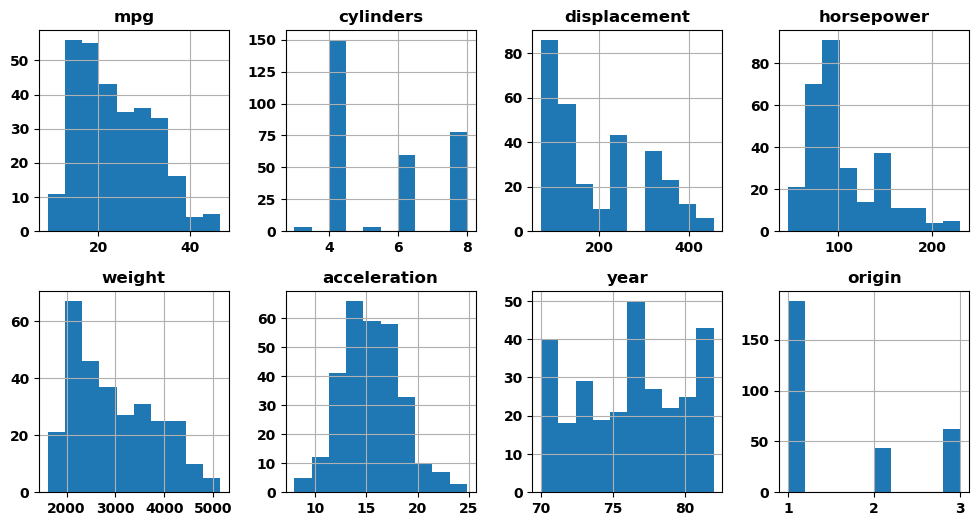

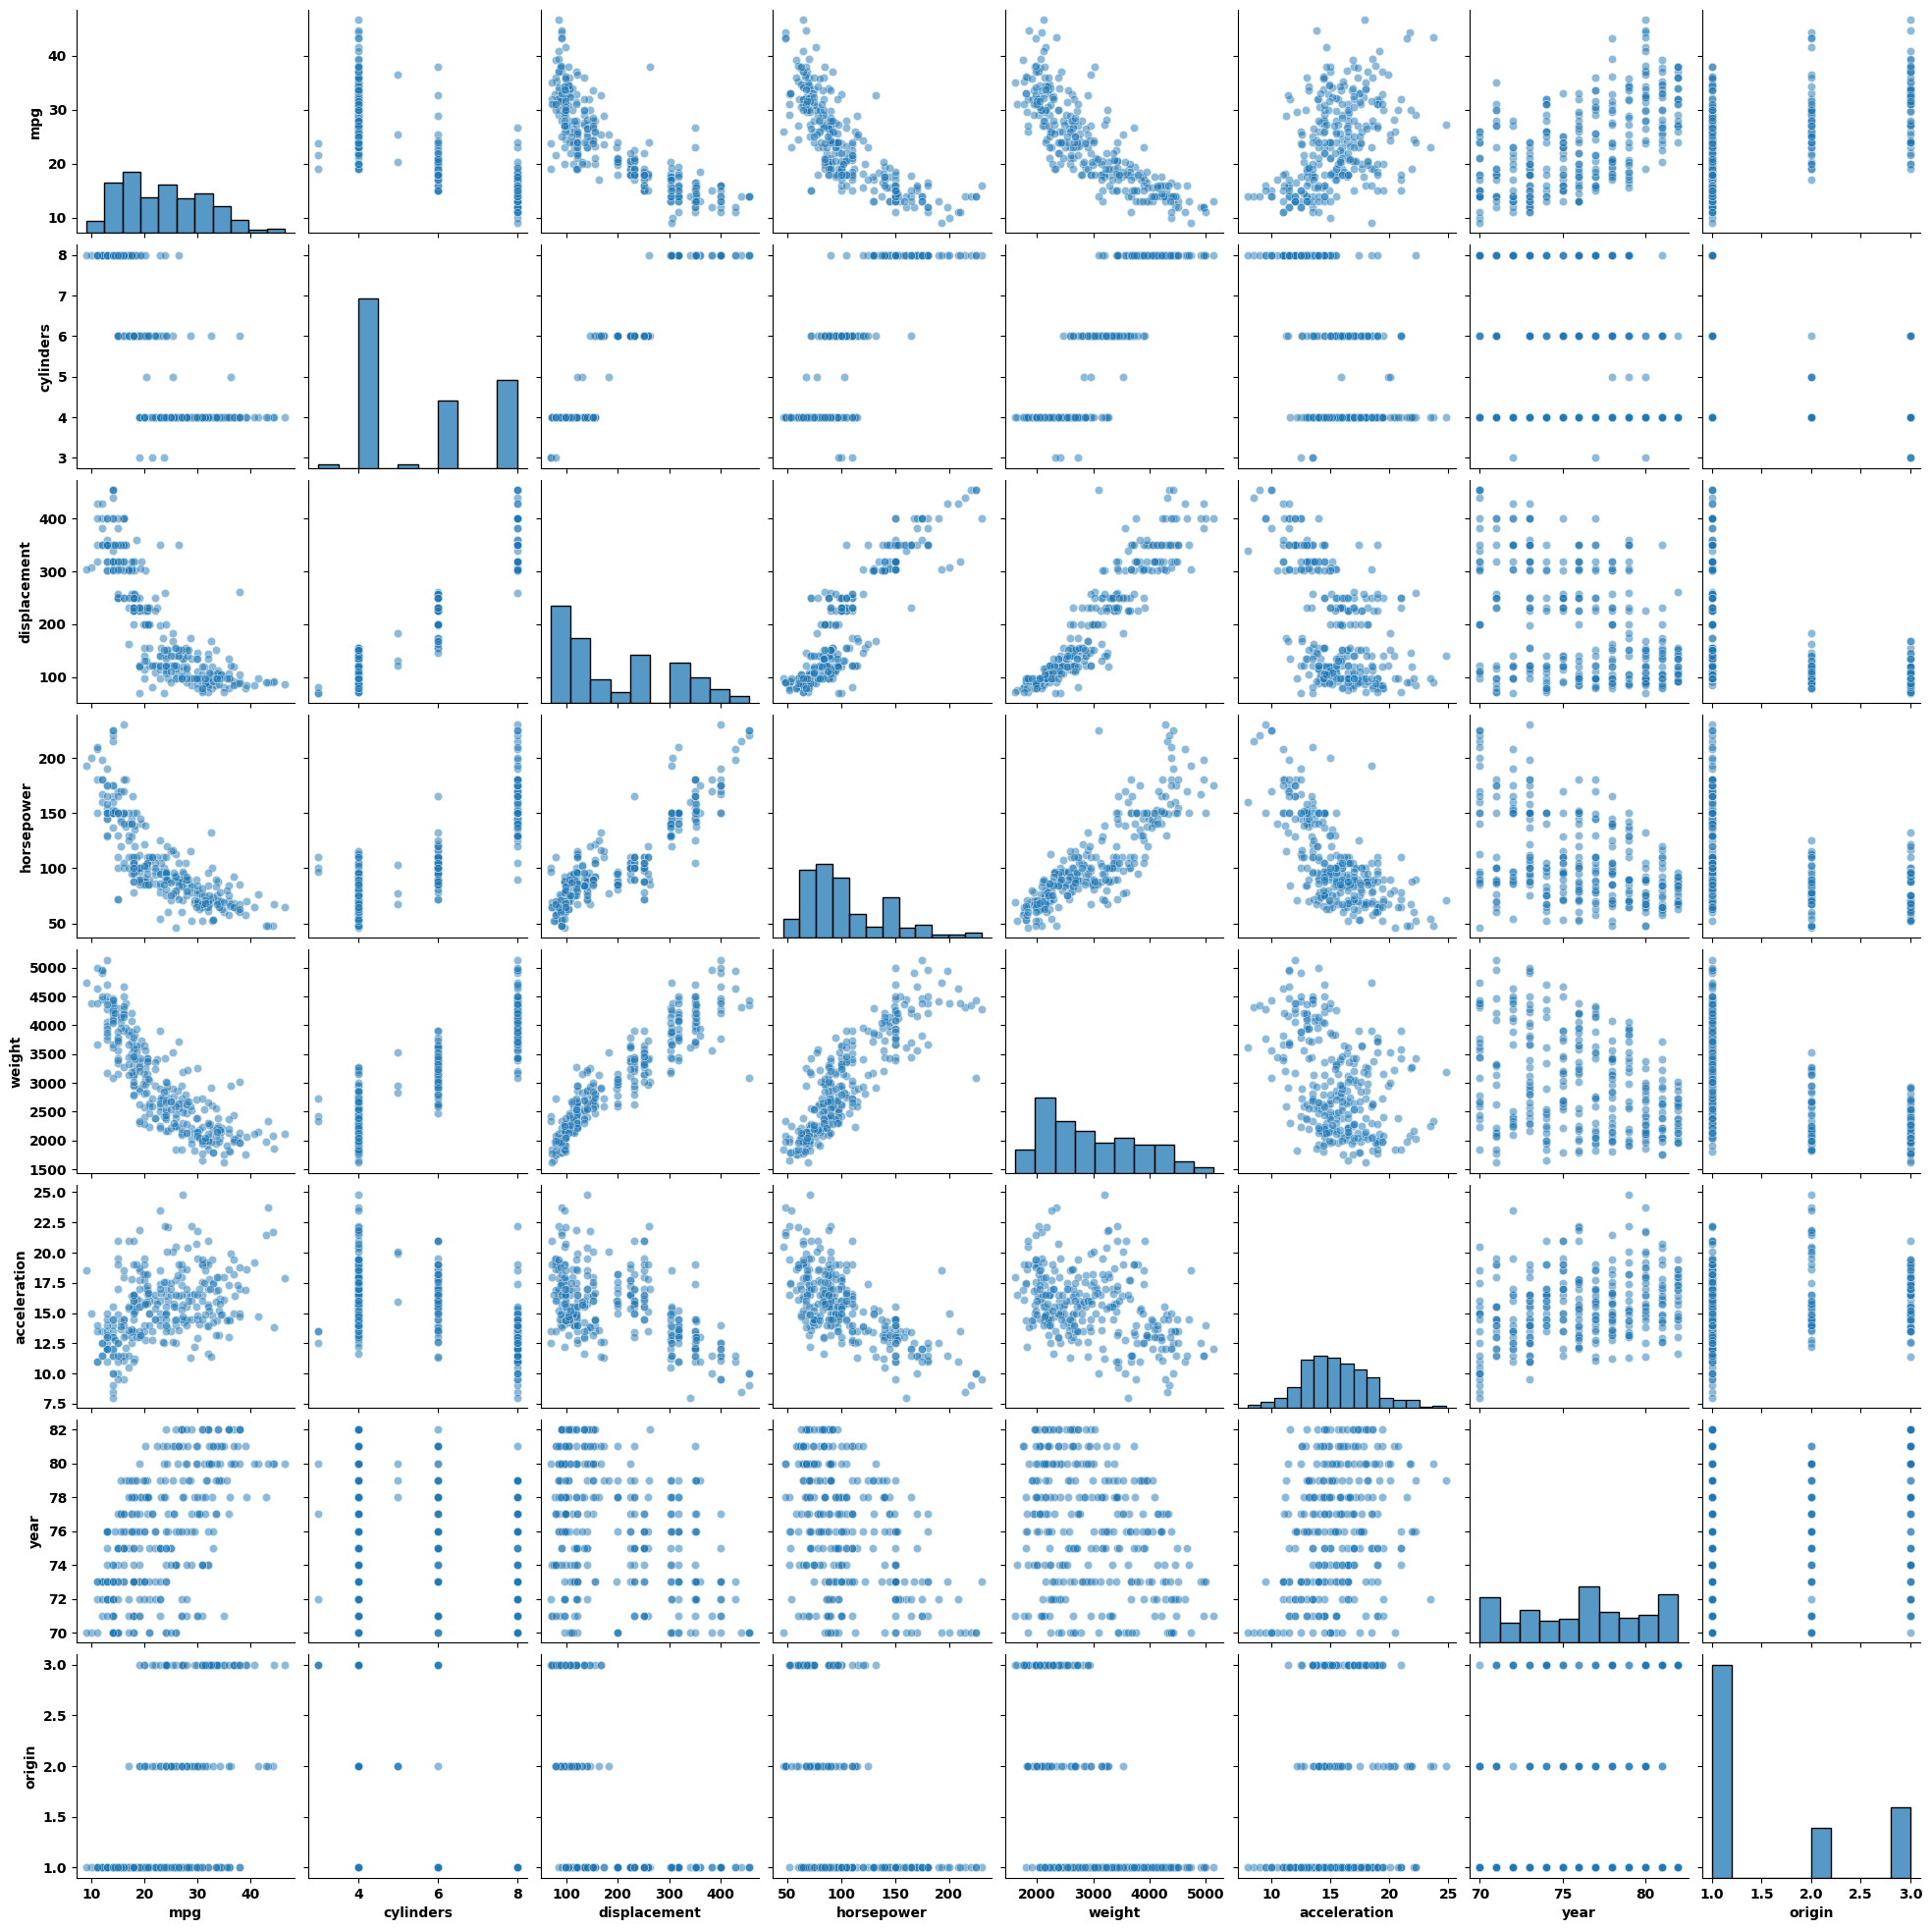

In [5]:
#STEP 2

#STUDENT CODE - Insert code to explore the dataset here
### ------------  STUDENT CODE HERE----------------

display(md(r"Data Info:"))
display(train_df.info())
display(md(r"Data Statistics:"))
display(train_df.describe()) # high level statistics to get an idea for the amount, levels, and distribution
display(md('Data Correlations:'))
display(train_df.corr(numeric_only=True)) # numerical correlation
train_df.hist(layout=(2,4), figsize=(12,6));

sns.pairplot(train_df, plot_kws={'alpha': 0.5}) # I find the seaborn one to look a lot more polished than the pandas version out of the box
plt.show();

### ------------ END STUDENT CODE HERE----------------



##### <font color='blue'>Written Responses</font>

1. How many observations/datapoints are there?
   
   <font color='green'>STUDENT ANSWER</font>

   <font color='green'>The table above shows that there are 392 observations total after NaN values are removed (294 in the trainig set, 92 in the test set).</font>

2. How many features/attributes are there per observation? Describe these features in terms of type of data (feature/response and numerical/categorical)
   
   <font color='green'>STUDENT ANSWER</font>

   <font color='green'>Each observation has nine features. Input features include `cylinders` (numerical),	`displacement` (numerical), `horsepower` (numerical), `weight` (numerical), `acceleration` (numerical), `year` (numerical), `origin` (categorical), and `name` (categorical). The numerical response attribute is `mpg`.</font>

3. Describe the distribution of each feature in terms of statistical descriptions (e.g., uniform, normal/Gaussian, exponential, skewed, multi-modal).

   <font color='green'>STUDENT ANSWER</font>

   <font color='green'>The histograms indicate that only the `acceleration` feature has a normal distribution. The `displacement`, `horsepower`, `mpg`, and `weight` features are all skewed to lower numbers indicating that the dataset may consist primarily of cars with smaller engines.  The `year` feature is relatively uniform with some multi-modal behavior at the extremes and in the middle of the range. Nearly all of the vehicles have an even number of `cylinders`, though the dataset contains more vehicles with 4 `cylindars`. The meaning of the `origin` feature is unclear, but most of the vehicles have a value of 1. </font>

4. Describe the attributes you chose for relational analysis in terms of weak- and strong-relationships, linear and non-linear relationships, and positive and negative correlations.

   <font color='green'>STUDENT ANSWER</font>

   <font color='green'>Analysis is conducted on pair of numerical features. The `cylinders` attribute appears to have a negative linear correlation with `mpg` and `acceleration`, and it has a positive linear relationship with `displacement`, `horsepower`, and `weight`. Likewise, `mpg` has a weak but somewhat positive linear relationship with `year`. On the other hand, `mpg` has a negative exponential relationship with `displacement`, `horsepower`, and `weight`, but `mpg` may have a weak positive relationship with `acceleration` that is either linear or exponential. The `displacement` attribute has a strong, positive, linear relationship with `horsepower` and `weight`, but it has a weak, negative relationship with `acceleration`. `horsepower` has a strong, positive, linear relationship with `weight`, and negative relationship with `acceleration`. All other relationships appear to have at best a weak correlation, if any at all.</font>

In [6]:
STEP_02_COMPLETE = True

### Find optimal $\beta_1$ value

In steps 3-7, you'll find an optimal $\beta_1$ value assuming $\beta_0$ = 40.

#### STEP 3
Make a single scatterplot of horsepower (x axis) by MPG (y axis). use `matplotlib` `pyplot`'s `scatter` function.  Ensure your x and y axis lables are labeled, tickmarks are reasonable and the title of the graph is correct.

Set the axes so that the origin (0,0) is included, as well as all of the datapoints. Label axes appropriately, "Horsepower" and "MPG"). 

Assuming the relationship between Horsepower and MPG is linear and $\beta_0$ (y-intercept) is fixed at 40, estimate a value of `beta1guess` (slope) from a visual inspection of the scatterplot.

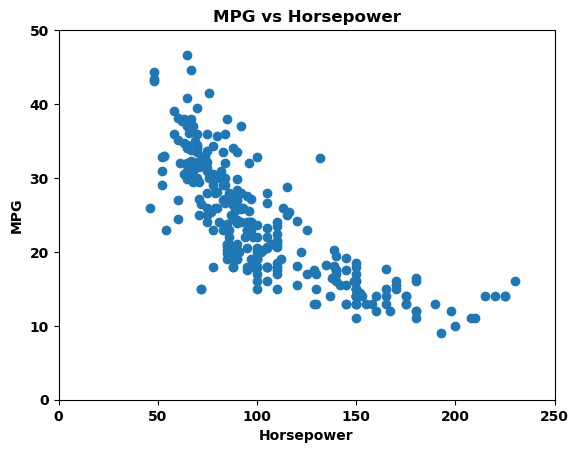

Student guess for beta_1: -0.13333333333333333


In [7]:
#STEP 3

beta0init = 40.  #dont change this initialization value in this step

#STUDENT CODE - Make a single scatterplot of horsepower (x axis) by MPG (y axis) 
# Insert the value of beta1guess based on eyeballing the graph
### ------------ STUDENT CODE HERE----------------

plt.scatter(train_df.horsepower, train_df.mpg)
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower')
plt.xlim([0,250])
plt.ylim([0,50])
plt.show()

beta1guess = -30./225. # rise over run approximation by student

### ------------ END STUDENT CODE HERE----------------

print("Student guess for beta_1:", beta1guess)
#md(r"Guess for $\beta_1$ = %f" %beta1guess)

STEP_03_COMPLETE = True

#### STEP 4
Make a `numpy` array of possible $\beta_1$ values named `beta1bracket` that surround your `beta1guess` value. Do not hard code your values. Instead, use code. You may find the `numpy` `arange` or the `linspace` functions useful.

In [8]:
#STEP 4

#STUDENT CODE - Insert code to make a set of possible beta1 values to test & display the values you chose

beta1bracket = None #placeholder
### ------------  STUDENT CODE HERE----------------

beta1bracket = np.arange(0., -0.5, -0.001) # used arange as opposed to linspace for ease of step size

### ------------ END STUDENT CODE HERE----------------

print(beta1bracket)
STEP_04_COMPLETE = True

[ 0.    -0.001 -0.002 -0.003 -0.004 -0.005 -0.006 -0.007 -0.008 -0.009
 -0.01  -0.011 -0.012 -0.013 -0.014 -0.015 -0.016 -0.017 -0.018 -0.019
 -0.02  -0.021 -0.022 -0.023 -0.024 -0.025 -0.026 -0.027 -0.028 -0.029
 -0.03  -0.031 -0.032 -0.033 -0.034 -0.035 -0.036 -0.037 -0.038 -0.039
 -0.04  -0.041 -0.042 -0.043 -0.044 -0.045 -0.046 -0.047 -0.048 -0.049
 -0.05  -0.051 -0.052 -0.053 -0.054 -0.055 -0.056 -0.057 -0.058 -0.059
 -0.06  -0.061 -0.062 -0.063 -0.064 -0.065 -0.066 -0.067 -0.068 -0.069
 -0.07  -0.071 -0.072 -0.073 -0.074 -0.075 -0.076 -0.077 -0.078 -0.079
 -0.08  -0.081 -0.082 -0.083 -0.084 -0.085 -0.086 -0.087 -0.088 -0.089
 -0.09  -0.091 -0.092 -0.093 -0.094 -0.095 -0.096 -0.097 -0.098 -0.099
 -0.1   -0.101 -0.102 -0.103 -0.104 -0.105 -0.106 -0.107 -0.108 -0.109
 -0.11  -0.111 -0.112 -0.113 -0.114 -0.115 -0.116 -0.117 -0.118 -0.119
 -0.12  -0.121 -0.122 -0.123 -0.124 -0.125 -0.126 -0.127 -0.128 -0.129
 -0.13  -0.131 -0.132 -0.133 -0.134 -0.135 -0.136 -0.137 -0.138 -0.139
 -0.14

#### STEP 5a

Create a function `rss1d(beta0, beta1, x, y)` to compute the sum of squared residuals (RSS) for a given $\beta_0$ and $\beta_1$ and a vector of input features `x` and target values `y`. You may assume that `x` and `y` are each single vector arrays (in this case, `pandas` Series).

In [9]:
#STEP 5


#rssbeta1 = None

def rss1d(beta0, beta1, x, y):
    '''compute the sum of squared residuas for a given beta_0 and beta_1 over a vector of input features x and target values y'''
    
    function_output = None #placeholder for the output of your function
    
    #remember to indent your code for the function internals

    ### ------------  STUDENT CODE HERE----------------

    # remove unnecessary axes from x and y 
    x = np.squeeze(x)
    y = np.squeeze(y)

    # display a warning and return if x is not one dimensional
    if len(x.shape) != 1 and len(y.shape) != 1:
        warnings.warn('rss1d is built for 1-dimensional x and y')
        return

    beta = np.array([beta0, beta1], dtype="object")

    # Create a 2d design matrix from x
    X = np.array([np.ones(x.shape[0]),x]).T

    # np.dot returns 2d array, so we squeeze to remove extra dimension
    yhat = np.squeeze(np.dot(X,beta)) 

    # calculate residuals
    ydiff = y-yhat

    # return residual sum of squares
    function_output = np.dot(ydiff,ydiff)
    
    ### ------------ END STUDENT CODE HERE----------------
    
    return function_output

#UNIT TEST FOR rss1d 
def rss1dUnitTest():   
    tb0=np.array(0)   
    tb1=np.array(1) 
    tx=np.array([[1],[2],[3]])
    ty=np.array([[2],[4],[6]])
    trss = rss1d(tb0,tb1,tx,ty)
    assert trss==14.0, "rss1d not returning correct answer 14.0"
    return 'successful'

print("Running rss1d unitTest...",rss1dUnitTest())  #run the unit test


Running rss1d unitTest... successful


#### STEP 5b

Then, call the function function created above to compute the RSS for the fixed `beta0init` value (40) and for each member of the `beta1bracket` vector you created in STEP 4. Store these RSS values in a `numpy` array named `rssbeta1`.

In [10]:
#STUDENT CODE - Insert code to compute the sum of squared residual errors (RSS) under each possible beta1bracket member.


rssbeta1 = None #placeholder for your code to store the result

### ------------  STUDENT CODE HERE----------------


def loop_method():
    '''slow method of computation with loops'''
    rssbeta1 = np.array([]) # could preallocate to size of beta1bracket, but then have to use multiple for args and enumerate
    for beta1 in beta1bracket:
        rssbeta1 = np.append(rssbeta1, rss1d(beta0init, beta1, train_df.horsepower, train_df.mpg))

    return rssbeta1

def vector_method(): # this vector method runs 60-80 times faster than the loop method
    '''faster method of computation using vectorized operations'''
    return np.array(rss1d(beta0init, beta1bracket, train_df.horsepower, train_df.mpg))

rssbeta1 = vector_method()  #choosing the vector method since it is faster

### ------------ END STUDENT CODE HERE----------------


STEP_05_COMPLETE = True

#### STEP 6

Make a new plot of $\beta_1$ values on the x axis and the RSS values you calculated in STEP 5 on the y axis (computed in step 5). Label your axes and use math fonts in your labels.

Use the `numpy` function `argmin` to find the $\beta_1$ value having the smallest RSS. Store this value in a variable named `beta1min`.

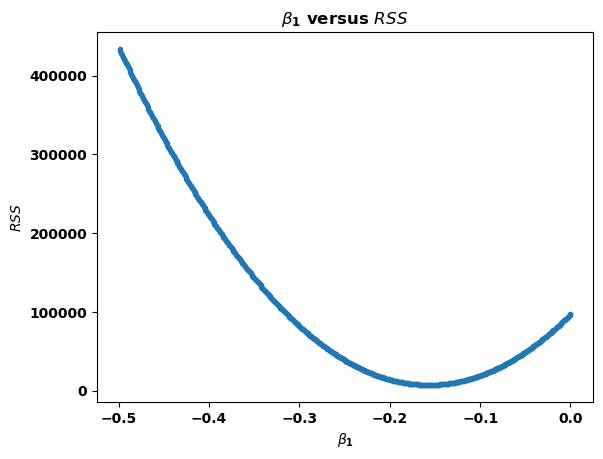

$\beta_1$ for minimum $RSS = -0.157000$

In [11]:
#STEP 6

#STUDENT CODE - make a new plot of beta_1 values on the x axis and RSS cost on the y axis (computed in step 5). 
#label your axes and use math fonts in your labels if possible
#find the beta1 value having the smallest RSS, and assign this value to beta1min


beta1min = None #placeholder


### ------------  STUDENT CODE HERE----------------

plt.scatter(beta1bracket,rssbeta1, marker='.')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$RSS$')
plt.title(r'$\beta_1$ versus $RSS$')
plt.show();

beta1min = beta1bracket[np.argmin(rssbeta1)]
display(md(r'$\beta_1$ for minimum $RSS = %f$' %beta1min))

### ------------ END STUDENT CODE HERE----------------

 

STEP_06_COMPLETE = True

#### STEP 7

Describe the RSS plot you created in STEP 6 by answering the following questions.

1. What is the shape of the plot in STEP 6?  
  
  <font color='green'>STUDENT ANSWER</font>

  <font color='green'>The shape of the beta_1 vs. RSS plot is a parabola - RSS appears to be a quadratic function of beta_1 .</font>

2. Using the plot, how might someone find the best value of beta_1:  
  
  <font color='green'>STUDENT ANSWER</font>

  <font color='green'>The best value of beta_1 is the value with the smallest error, or the beta_1 value at the bottom of the parabola.</font>

3. Select & report value of beta_1 you think will have the best fit. Note that you may need to improve your estimate in STEP 3 or add additional $\beta_1$ values in `beta1bracket` in STEP 4, then repeat steps 5 and 6. Assuming the range of values in `beta1bracket` have sufficient granularity and contain an optimal beta_1 value, you may find the use of the `numpy` function `argmin` will be helpful to find the beta_1 value having the smallest RSS value.

  <font color='green'>STUDENT ANSWER</font>

  <font color='green'>The beta_1 value providing the best fit (assuming steps of 0.001 searching in the range of -0.5 and 0.0) is beta_1 = -0.158.</font>

In [12]:
STEP_07_COMPLETE = True

### Evaluate $\beta_1$ value

In steps 8-12, you'll evaluate the $\beta_1$ value you discovered in steps 3-7 and compare it to the closed form solution.*italicized text*

#### STEP 8
Build a new scatterplot with horsepower(x axis) vs MPG (y axis). Label your scatterplot data, "Raw data".

Add a line to the plot - the linear regression line in red implied by the fixed $\beta_0 = 40$ (`beta0init`) and your best choice for $\beta_1$ (`beta1min`). Label your linear regression line, "1st order fitted line" in the legend.

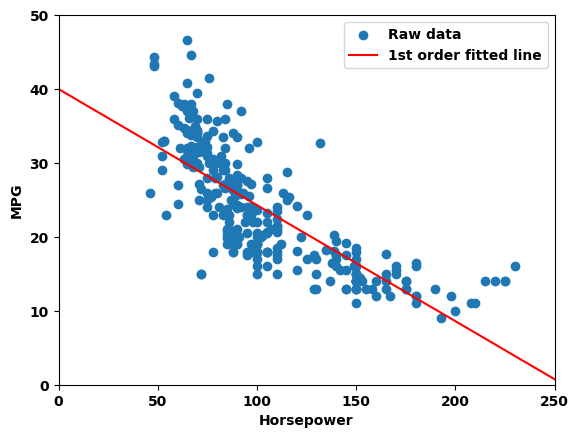

In [13]:
#STEP 8

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the fixed beta0init=40 and your best choice for beta1 

### ------------ STUDENT CODE HERE----------------

plt.scatter(train_df.horsepower, train_df.mpg, label='Raw data')
plot_x = np.arange(0,251,1)
yhat = beta0init+beta1min*plot_x # easier to calculate without putting in vector form for 1-variable regression
plt.plot(plot_x, yhat, '-r', label='1st order fitted line')
plt.xlim([0,250])
plt.ylim([0,50])
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show();


### ------------ END STUDENT CODE HERE----------------


STEP_08_COMPLETE = True

#### STEP 9
Implement equation 3.4 on page 62 to develop the closed-form function `computeBetas(xVec, yVec)` 
which accepts a column vector of x values and a column vector of y values and returns betas, 
which is a structure containing the values for the 2 coefficients $\beta_0$ and $\beta_1$  

In [14]:
#STEP 9

#STUDENT CODE - In code, implement equation 3.4 on page 62 to develop the closed-form function computeBetas(xVec, yVec) 
# which accepts a column vector of x values and a column vector of y values and returns betas, 
# which is a structure containing the values for the 2 coefficients beta0 and beta1  

def computeBetas(xVec, yVec):
    function_output = None #placeholder

### ------------  STUDENT CODE HERE----------------

    #functions can be written inside of functions - but they are not visible outside of the encapsulating outer function
    def computeBetasMatrixForm(xVec, yVec):
        '''using the matrix form method'''
        if len(xVec.shape)==1: # need to expand dims if shape of form (n,)
            xVec = np.expand_dims(xVec,1)

        if  not np.allclose(np.ones((xVec.shape[0],1)),xVec[:,0]): # check if there is already a column of ones in front
            xVec = np.hstack([np.ones((xVec.shape[0],1)),xVec])

        XpX = np.dot(xVec.T,xVec) # X'X
        XpY = np.dot(xVec.T,yVec) # X'Y

        return np.dot(np.linalg.inv(XpX),XpY) # b=(X'X)^-1(X'Y)

    def computeBetasNonMatrixForm(xVec, yVec):
        '''using the non-matrix form method'''
        beta1 = np.sum(np.dot((xVec - np.mean(xVec)).T,(yVec - np.mean(yVec)))) / np.sum((xVec - np.mean(xVec)) ** 2)    
        beta0 = np.mean(yVec) - beta1 * np.mean(xVec)
        return [beta0, beta1]

    #below we obtain the answer from one of the two functions defined in this function
    function_output = computeBetasMatrixForm(xVec=xVec,yVec=yVec)  #pick which internal function to use

### ------------ END STUDENT CODE HERE----------------

    return function_output


#UNIT TESTING
def computeBetasUnitTest():   

    txVec=np.array([[1],[2],[3]])
    tyVec=np.array([[2],[4],[6]])
    tBetas = computeBetas(txVec,tyVec)
    correctBetas = np.array([[0.],[2.]])
    np.testing.assert_array_equal(tBetas, correctBetas ), 'computeBetas not returning correct answer [[0.][2.]]'
    return 'successful'

print("Running computeBetasUnitTest unitTest...",computeBetasUnitTest())  #run the unit test 

STEP_09_COMPLETE = True

Running computeBetasUnitTest unitTest... successful


In the `computeBetasMatrixForm` function above I used the matrix form of Equation 3.4 on page 62 of ISLR. The equation is $\mathbf{b} = \left(\mathbf{X}'\mathbf{X}\right)^{-1}\mathbf{X}'\mathbf{Y}$ and comes from Equation 5.60 on page 200 of _Applied Linear Statistical Models, 5th ed._ by Kutner, Nachtsheim, Neter, and Li. It is the book used in Math 696, Applied General Linear Models. The matrix form calculates the betas approximately 9% faster than the non-matrix form.

#### STEP 10
Compute and display the best $\beta_0$ and $\beta_1$ for the auto dataset by calling the closed-form function in step 9

In [15]:
#STEP 10
#STUDENT CODE - Compute and display beta0 and beta1 for the auto dataset by calling the closed-form function in step 9

### ------------  STUDENT CODE HERE----------------

betas = computeBetas(train_df.horsepower, train_df.mpg)
display(md(r'Best $\beta_0=$ %f' %betas[0])) #trick to show the results of python code as a markdown cell
display(md(r'Best $\beta_1=$ %f' %betas[1]))


### ------------ END STUDENT CODE HERE----------------


STEP_10_COMPLETE = True

Best $\beta_0=$ 40.670412

Best $\beta_1=$ -0.162513

#### STEP 11

How does the closed form computed value of $\beta_1$ compare with your estimate of $\beta_1$ from step 6? 

<font color='green'>STUDENT ANSWER</font>

<font color='green'>
The  calculated best $\beta_0$ varies by $\approx 0.064$ from the one used in the iterative $\beta_1$ search, so we would not expect to have exactly the same results for the analytical solution, yet the analytical $\beta_1=-0.157845$ differs from the iterative $\beta_1=0.1580$ by only $0.000155$. It is possible that with a smaller step size than $0.001$, we could have obtained a $\beta_1$ value closer to the analytical solution. However, due to the difference in $\beta_0$, it is unlikely that we would ever reach the exact same optimal $\beta_1$ value. Nonetheless, given the range of the horsepower data is about $200$, the difference in $\beta_1$ accounts for about $0.03$ miles per gallon over that interval. Since miles per gallon is only reported to the tenths, we are well within the data's measurement error.</font>


In [16]:
STEP_11_COMPLETE = True

#### STEP 12
Build a new scatterplot of the training data with horsepower(x axis) vs MPG (y axis). 

* Label your scatterplot data, "Raw data".
* Add a <font color="green">green</font> linear regression line formed by the closed form beta values you determined in STEP 10. 
* Label your linear regression line, "1st order closed-form fit".
* Add axis labels and a title


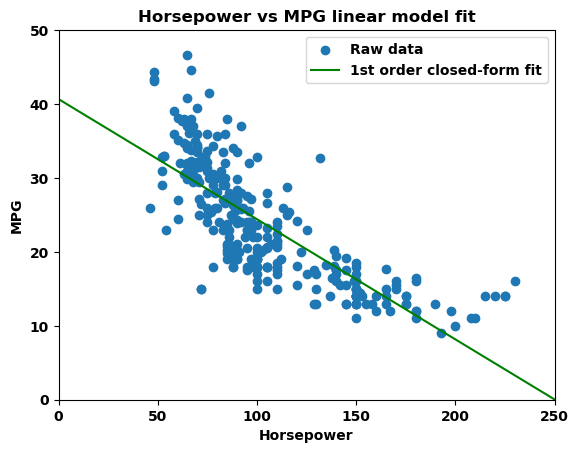

In [17]:
#STEP 12

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the beta0 and beta1 you determined in step 10 

### ------------ STUDENT CODE HERE----------------

plt.scatter(train_df.horsepower, train_df.mpg, label='Raw data')
plot_x = np.arange(0,251,1)
yhat = betas[0]+betas[1]*plot_x # easier to calculate without putting in vector form for 1-variable regression
plt.plot(plot_x, yhat, '-g', label='1st order closed-form fit')
plt.xlim([0,250])
plt.ylim([0,50])
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs MPG linear model fit')
plt.legend()
plt.show();

### ------------ END STUDENT CODE HERE----------------


STEP_12_COMPLETE = True

### Fit model using `sklearn`

#### STEP 13
Use `sklearn`'s `linear_model` function to fit a linear model on the training set such that the model uses the feature horsepower to predict mpg. Store your model in a variable named `mpg_hp_model`. Using the model's accessors, obtain the coefficients and store them in `beta0` and `beta1`.

On the *test set*, compute the explained variance score, and MSE, store the values in variables names  `r2`, and `mse`. Display each of these values.

Hint:  see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [18]:
#STEP13

#STUDENT CODE - Use sklearn's linear model function to fit a linar model from horsepower to mpg. 
# also, display the coefficients, MSE and explained variance score

mpg_hp_model= None #placeholder for the linear model from sklearn

#placeholders for extracted values from sklearns linear model
beta0 = None
beta1 = None
#placeholders for computed performance values
r2 = None
mse = None

### ------------ STUDENT CODE HERE----------------

mpg_hp_model = linear_model.LinearRegression()

# we must change the series (1d array) to a vertical 2d array
# each of the following are equivalent

# X = train_df.horsepower.values.reshape(-1,1)
# X = np.expand_dims(train_df.horsepower, axis=1)
train_X = np.array(train_df.horsepower)[:, np.newaxis]

# fit the model to the inputs and outputs
mpg_hp_model.fit(train_X, train_df.mpg)

beta0 = mpg_hp_model.intercept_
beta1 = mpg_hp_model.coef_


#now work on test set

test_X = np.array(test_df.horsepower)[:, np.newaxis]


yhat = mpg_hp_model.predict(test_X)
r2_using_Score = mpg_hp_model.score(test_X, test_df.mpg)
r2_using_R2_score = r2_score(test_df.mpg,yhat)

mse = mean_squared_error(test_df.mpg, yhat)


### ------------ END STUDENT CODE HERE----------------

display(md(r'$\beta_0 =$ %f' %beta0.item()))
display(md(r'$\beta_1 =$ %f' %beta1.item()))
display(md(r'(using score) Test Set $R^2 =$ %f' %r2_using_Score))
display(md(r'(using r2_score) Test Set $R^2 =$ %f' %r2_using_R2_score))
display(md(r'Test Set $MSE =$ %f' %mse))



STEP_13_COMPLETE = True

$\beta_0 =$ 40.670412

$\beta_1 =$ -0.162513

(using score) Test Set $R^2 =$ 0.565579

(using r2_score) Test Set $R^2 =$ 0.565579

Test Set $MSE =$ 21.909181

#### STEP 14
Using the *test set* data, build a new scatterplot with horsepower (x axis) vs MPG (y axis). Label your scatterplot data, "Raw data".

Create a new plot with a black linear regression line computed by the `sklearn` model fitted in STEP 13.

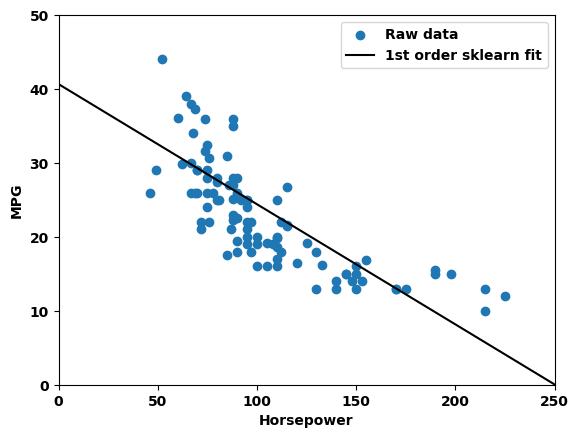

In [19]:
#STEP 14

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the sklearn model determined in step 13 

### ------------ STUDENT CODE HERE----------------

   
plt.scatter(test_df.horsepower, test_df.mpg, label='Raw data')
yhat = mpg_hp_model.predict(plot_x[:, np.newaxis])
plt.plot(plot_x, yhat, '-k', label='1st order sklearn fit')
plt.xlim([0,250])
plt.ylim([0,50])
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show();

### ------------ END STUDENT CODE HERE----------------

 

STEP_14_COMPLETE = True

## STEP 15a:
Compute the residual errors in predicting MPG from horsepower using the ```sklearn``` model.  Plot these residual errors as a function of horsepower using a scatterplot.  Add a red horizontal line at y=0 to indicate the zero-error position.

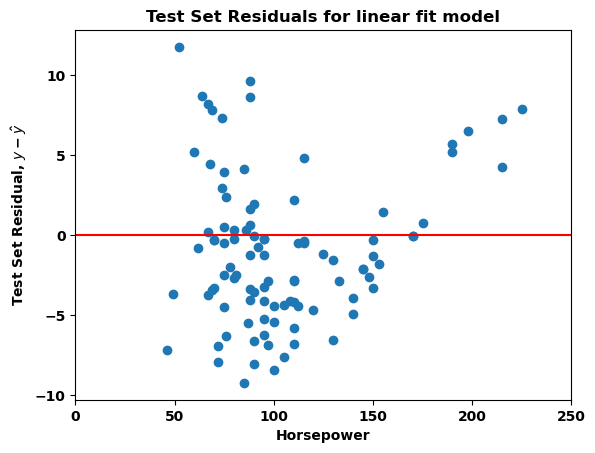

In [20]:
#STUDENT CODE


### ------------ END STUDENT CODE HERE----------------

  
yhat = mpg_hp_model.predict(np.array(test_df.horsepower)[:, np.newaxis])
residuals = test_df.mpg - yhat

plt.scatter(test_df.horsepower, residuals)
plt.hlines(0,0,250, color='r')
plt.xlim([0,250])
plt.xlabel('Horsepower')
plt.ylabel(r'Test Set Residual, $y-\hat{y}$')
plt.title('Test Set Residuals for linear fit model')
plt.show();


### ------------ END STUDENT CODE HERE----------------

      

## STEP 15b

Describe the plot. Do the errors appear well-distributed, or are there trends in the residuals? If there are trends, explain what these trends indicate about the ability to predict mpg from horsepower using a linear model, and give at least one course of action you could take to make a better model.

<font color='green'>STUDENT ANSWER:</font>

<font color="green">The plot shows the residuals of the fit of mpg estimated from the horsepower feature. The data is heavily represented in lower horsepowers, as discussed above, but it is apparent there is a distinct curvature to the residuals, indicating there may be non-linearity in the relationship between mpg and horsepower. This suggests a polynomial model might work better than a linear model.  One approach to a better prediction would be to include a second order term in the model.  This model would have beta0, beta1 and beta2 coefficients.  By using both squared horsepower and horsepower to predict mpg the fit is likely to improve. </font>



In [21]:
STEP_15_COMPLETE = True

## STEP 16 (Optional)
Optional (not required, but good practice in developing your coding skills):  build a structure containing possible values for $\beta_0$ and $\beta_1$ pairs.   Compute the RSS over all beta pairs at each cell in the matrix on the horsepower vs. MPG data.  Now build a contour and/or 3D plot of these RSS values as shown in the book Figure 3.2 on page 63 (the x and y axes are $\beta_0$ and $\beta_1$ and the z axis is RSS).   On your contour/3D plot, add a point at the location of the best $\beta_0$, $\beta_1$ coordinates which minimize the RSS.

Hint:  `numpy` `meshgrid` may be helpful here (https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.htmlhttps://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)

Hint:  `bb0` and `bb1` are provided as the ideal best beta coefficients - center your contour plot on these values

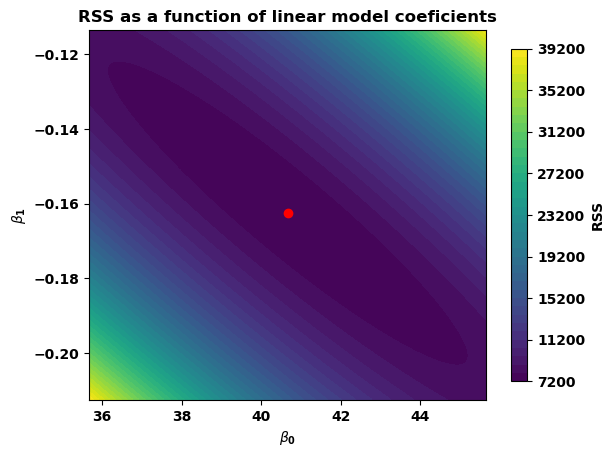

In [22]:
#STUDENT CODE


bb0=40.670412  #found best beta0 
bb1= -0.162513  #found best beta1


### ------------  STUDENT CODE HERE----------------


tol0 = 5.
tol1 = 0.05
(minb0,maxb0)=(bb0-tol0,bb0+tol0)
(minb1,maxb1)=(bb1-tol1,bb1+tol1)
gridcount0 = 500
gridcount1 = 100

beta0bracket = np.arange(minb0, maxb0, (maxb0-minb0)/gridcount0) # used arange as opposed to linspace for ease of step size
beta1bracket = np.arange(minb1, maxb1, (maxb1-minb1)/gridcount1) # used arange as opposed to linspace for ease of step size


def rss2d(beta0, beta1, x, y):
    '''compute the sum of squared residuas for a given beta_0 and beta_1 over a vector of input features x and target values y'''
    
    function_output = None #placeholder for the output of your function
    
    #remember to indent your code for the function internals

    # remove unnecessary axes from x and y 
    x = np.squeeze(x)
    y = np.squeeze(y)

    # display a warning and return if x is not one dimensional
    if len(x.shape) != 1 and len(y.shape) != 1:
        warnings.warn('rss2d is built for 1-dimensional x and y')
        return

    #generate the grids of b0b1 to inspect
    #note that capital letters mean the result of vectorized operations over all b0b1 gridpoints
    B0,B1,X = np.meshgrid(beta0,beta1,x)
    #generate a grid of truth values from Y such that it matches the shape of the previous grids
    _,_,Y = np.meshgrid(beta0,beta1,y)
    
    
    #estimate the results at each point in the b0b1 grid for all observations
    #produces a 3D-array (tensor)
    YHAT = np.multiply(B1,X)+B0
    
   
    # calculate residuals
    YDIFF = Y-YHAT
    
    # return residual sum of squares
    function_output = np.sum(np.square(YDIFF),axis=2)
 
    return function_output


#compute the RSS for all points in the beta0-beta1 grid
rssGrid = rss2d(beta0=beta0bracket, beta1=beta1bracket, x=train_df.horsepower, y=train_df.mpg)


#make a contour plot of RSS for the b0b1 grid
plt.figure()
cs = plt.contourf(beta0bracket,beta1bracket,rssGrid,levels=50)
cbar = plt.colorbar(cs, shrink=0.9)
cbar.ax.set_ylabel('RSS')
plt.xlabel(r'$\beta_0$')
plt.ylabel(r'$\beta_1$')
plt.title("RSS as a function of linear model coeficients")
plt.scatter(x=bb0,y=bb1,c='r')
plt.show()

### ------------ END STUDENT CODE HERE----------------






In [23]:
check_step_status()


STEP_00_COMPLETE : True
STEP_01_COMPLETE : True
STEP_02_COMPLETE : True
STEP_03_COMPLETE : True
STEP_04_COMPLETE : True
STEP_05_COMPLETE : True
STEP_06_COMPLETE : True
STEP_07_COMPLETE : True
STEP_08_COMPLETE : True
STEP_09_COMPLETE : True
STEP_10_COMPLETE : True
STEP_11_COMPLETE : True
STEP_12_COMPLETE : True
STEP_13_COMPLETE : True
STEP_14_COMPLETE : True
STEP_15_COMPLETE : True
